In [1]:
import pandas as pd


In [2]:
#Importando dados
dados = pd.read_csv('Base_v2.csv', sep = ';', error_bad_lines=False, index_col=False, dtype='unicode')


In [3]:
#ajustando os dados análise
dados['NU_NOTA_COMP1'] = dados['NU_NOTA_COMP1'].astype(float).fillna(0)
dados['NU_NOTA_COMP2'] = dados['NU_NOTA_COMP2'].astype(float).fillna(0)
dados['NU_NOTA_COMP3'] = dados['NU_NOTA_COMP3'].astype(float).fillna(0)
dados['NU_NOTA_COMP4'] = dados['NU_NOTA_COMP5'].astype(float).fillna(0)
dados['NU_NOTA_REDACAO'] = dados['NU_NOTA_REDACAO'].astype(float).fillna(0)
dados['TP_SEXO'] = dados['TP_SEXO'].fillna(0)
dados['TP_ENSINO'] = dados['TP_ENSINO'].fillna(0)
dados['SG_UF_ESC'] = dados['SG_UF_ESC'].fillna(0)
dados['NO_MUNICIPIO_ESC'] = dados['NO_MUNICIPIO_ESC'].fillna(0)
dados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001746144,GO,Goiânia,64,F,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0,0.0
1,190001029147,PA,Belém,26,F,0,3,1,1,0,0,0,0.0,0.0,0.0,0.0,NaN,0.0
2,190001177099,TO,Palmas,26,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0,0.0
3,190001482406,PE,Jaboatão dos Guararapes,27,F,2,3,1,1,0,0,1,120.0,120.0,120.0,80.0,80,560.0
4,190001595933,SP,Cafelândia,21,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,NaN,0.0


In [4]:
#média dos dados
dados['NU_NOTA_COMP1'].mean()


92.76275339177182

In [5]:
grupo = dados.groupby('TP_SEXO')

In [6]:
grupo.groups

{0: [5095270, 5095271], 'F': [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 15, 16, 18, 20, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 42, 51, 53, 54, 56, 57, 58, 59, 60, 61, 64, 66, 67, 68, 69, 71, 72, 75, 81, 82, 83, 85, 87, 89, 91, 92, 93, 96, 97, 98, 99, 100, 102, 103, 105, 107, 109, 110, 111, 114, 115, 117, 118, 119, 121, 123, 125, 127, 131, 134, 136, 137, 138, 141, 142, 143, 148, 149, 151, 153, 155, 156, 157, 158, 159, 162, 163, 165, 166, 170, 172, 173, ...], 'M': [7, 9, 10, 11, 14, 17, 19, 21, 22, 25, 33, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 55, 62, 63, 65, 70, 73, 74, 76, 77, 78, 79, 80, 84, 86, 88, 90, 94, 95, 101, 104, 106, 108, 112, 113, 116, 120, 122, 124, 126, 128, 129, 130, 132, 133, 135, 139, 140, 144, 145, 146, 147, 150, 152, 154, 160, 161, 164, 167, 168, 169, 171, 174, 176, 177, 179, 183, 186, 188, 189, 196, 198, 202, 206, 210, 212, 214, 216, 218, 219, 221, 226, 227, 228, 229, 231, 232, 239, ...]}

In [7]:
#Analise 
grupo['TP_SEXO'].describe().round(2)

,count,unique,top,freq
TP_SEXO,,,,
0,2,1,0,2
F,3031822,1,F,3031822
M,2063448,1,M,2063448


In [8]:
#Seleções e Frequências
#Seleção somente dos dados Femininos
selecao_feminino = dados['TP_SEXO'] == 'F'
freq_feminino = dados[selecao_feminino].shape[0]
freq_feminino

#Seleções e Frequências
#Seleção somente dos dados Masculinos
selecao_masculino = dados['TP_SEXO'] == 'M'
freq_masculino = dados[selecao_masculino].shape[0]
freq_masculino

2063448

In [9]:
grupo['NU_NOTA_COMP1'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
0,2.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
F,3031822.0,94.41,59.01,0.0,0.0,120.0,140.0,200.0
M,2063448.0,90.34,57.85,0.0,0.0,120.0,120.0,200.0


In [10]:
grupo['NU_NOTA_COMP1'].aggregate(['count', 'min', 'max', 'mean']).rename(columns = {'count': 'Quantidade', 'min':'Minimo', 'max' : 'Máximo', 'mean' : 'Média'})

,Quantidade,Minimo,Máximo,Média
TP_SEXO,,,,
0,2,0.0,0.0,0.000000
F,3031822,0.0,200.0,94.414672
M,2063448,0.0,200.0,90.335681


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))


Text(0.5, 1.0, 'Valor da Nota Complementar 1 por Sexo')

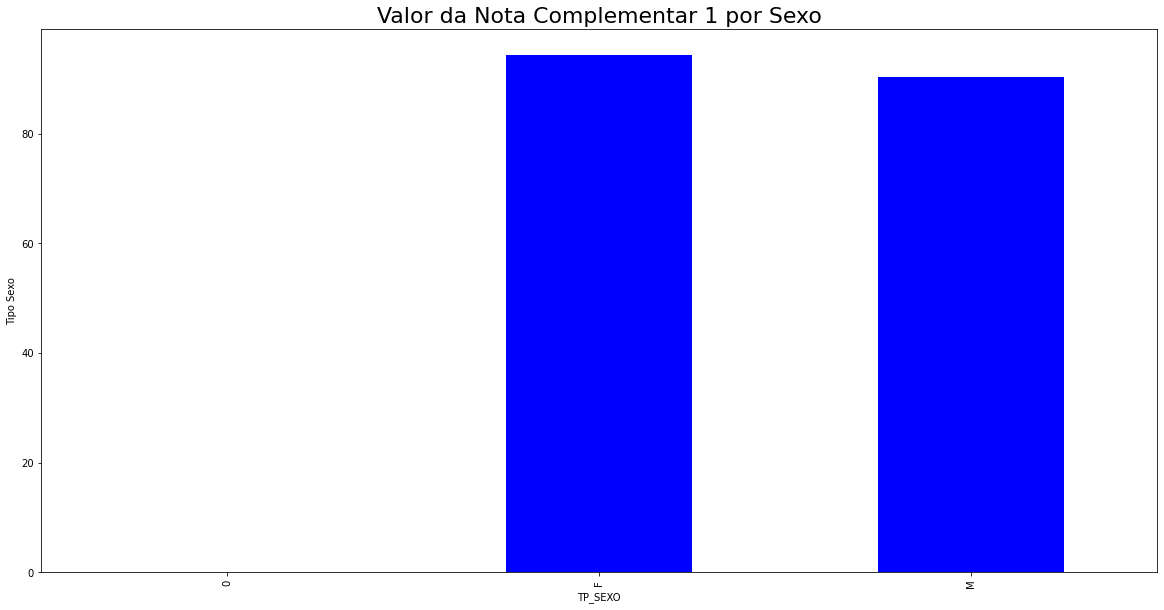

In [21]:
fig = grupo['NU_NOTA_COMP1'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Valor da Nota Complementar 1 por Sexo',{'fontsize':22})



In [23]:
grupo_UF = dados.groupby('SG_UF_RESIDENCIA')

In [25]:
grupo_UF['NU_NOTA_COMP1'].aggregate(['count', 'min', 'max', 'mean']).rename(columns = {'count': 'Quantidade', 'min':'Minimo', 'max' : 'Máximo', 'mean' : 'Média'})

,Quantidade,Minimo,Máximo,Média
SG_UF_RESIDENCIA,,,,
AC,38229,0.0,200.0,87.642889
AL,91707,0.0,200.0,91.696381
AM,118087,0.0,200.0,78.148992
AP,42140,0.0,200.0,86.551495
BA,398095,0.0,200.0,89.683869
CE,295870,0.0,200.0,92.251124
DF,94352,0.0,200.0,93.207563
ES,102435,0.0,200.0,92.347733
GO,170147,0.0,200.0,93.153097


Text(0.5, 1.0, 'Valor da Nota Complementar 1 por Sexo')

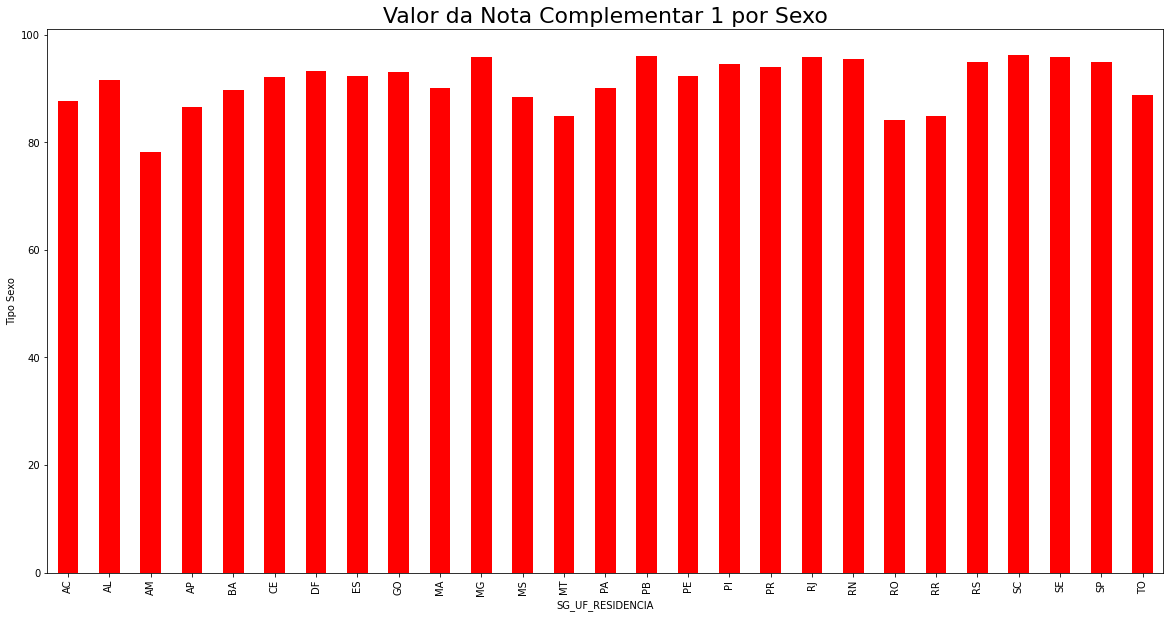

In [27]:
fig = grupo_UF['NU_NOTA_COMP1'].mean().plot.bar(color = 'red')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Média - Nota Complementar 1 por Sexo',{'fontsize':22})


Text(0.5, 1.0, 'Valor da Nota Complementar 1 por Sexo')

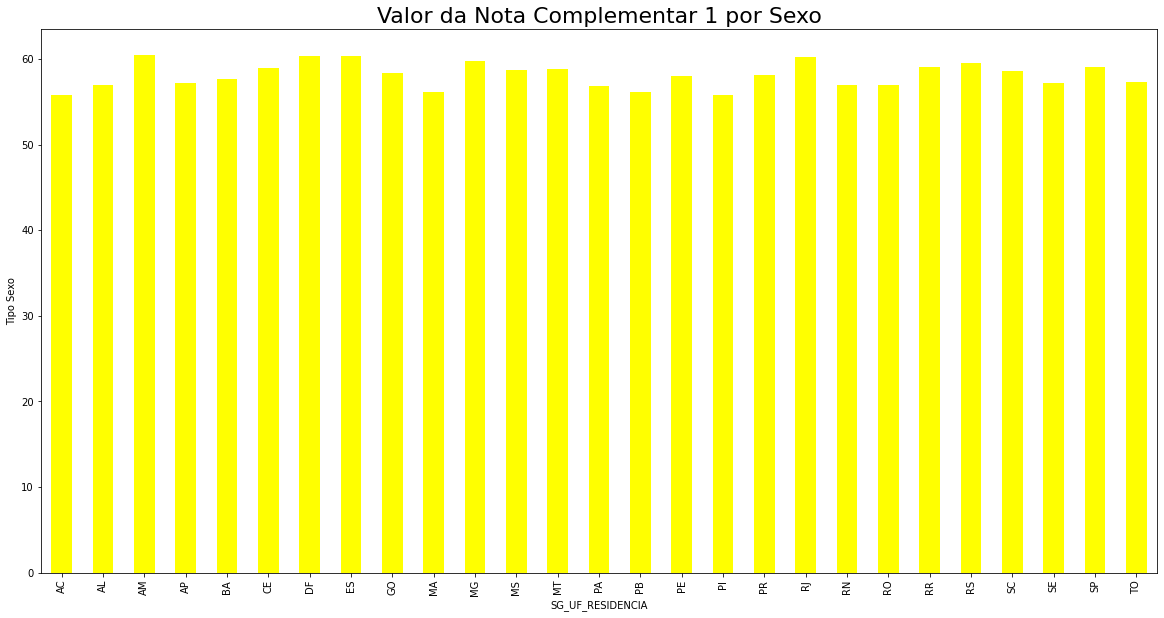

In [30]:
fig = grupo_UF['NU_NOTA_COMP1'].std().plot.bar(color = 'yellow')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Desvio Padrão -  Nota Complementar 1 por Sexo',{'fontsize':22})